In [44]:
import sklearn
sklearn.__version__

'0.23.1'

In [45]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics.pairwise import euclidean_distances

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

## Read the provided dataset and understand the observations

In [46]:
# Read data set provided from the Kaggle competition website

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

print("The training dataset contains {0} observations with {1} features for each observation.".\
    format(train_df.shape[0], train_df.shape[1]))
train_df.head()

The training dataset contains 15120 observations with 56 features for each observation.


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


## Split the training data into train and dev dataset

In [47]:
# Split the training data into train and dev data set.
# Read the training data into X and y
train_file = open("data/train.csv")
column_names_train = train_file.readline()
data = np.loadtxt(train_file, delimiter=",")

y, X = data[:, -1].astype('u1'), data[:, :-1]

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, y = X[shuffle], y[shuffle]

# Split the training data into 90% training data and 10% dev data
train_size = int(X.shape[0] * 0.9)

# Discard 1st feature (ID number that doesn't provide info about the label)
y_train, X_train = y[:train_size], X[:train_size, 1:]
y_dev, X_dev = y[train_size:], X[train_size:, 1:]
print(X_dev.shape, X_train.shape)

# Read the test data and store in X_test
test_file = open("data/test.csv")
column_names_test = test_file.readline()
data_test = np.loadtxt(test_file, delimiter=",")

# Save the test data in X_test. Test data does not have the 1st feature
X_test = data_test
X_test = X_test[:, 1:]
print(X_test.shape)

(1512, 54) (13608, 54)
(565892, 54)



----------------------------------------------------

For k: 1
              precision    recall  f1-score   support

           1       0.80      0.67      0.73       220
           2       0.72      0.66      0.69       208
           3       0.85      0.81      0.83       220
           4       0.94      0.96      0.95       212
           5       0.89      0.96      0.93       227
           6       0.83      0.91      0.87       206
           7       0.90      0.99      0.95       219

    accuracy                           0.85      1512
   macro avg       0.85      0.85      0.85      1512
weighted avg       0.85      0.85      0.85      1512


----------------------------------------------------

For k: 1 Match: 1291 Mismatch: 221 Total: 1512 Accuracy: 0.854
For k: 3 Match: 1258 Mismatch: 254 Total: 1512 Accuracy: 0.832
For k: 5 Match: 1236 Mismatch: 276 Total: 1512 Accuracy: 0.817
For k: 7 Match: 1214 Mismatch: 298 Total: 1512 Accuracy: 0.803
For k: 9 Match: 1200 Mismatch: 3

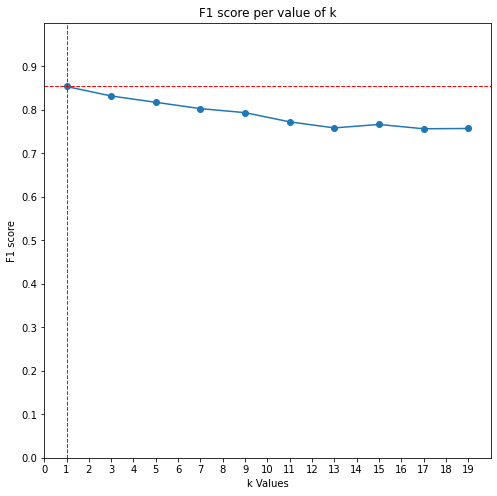



--------------------------------------------------------------------
The optimal value for k using GridSearchCV method is 1


In [48]:
def P2(k_values):

    '''
    KNN can be used for both classification and regression predictive problems. However, it is more widely 
    used in classification problems in the industry. The classification is based on the class of the neighbors.
    With increasing k value or more neighbors considered for classification, the boundary becomes smooth. The 
    training error rate and the validation error rate are two parameters we need to access different K-value. 
    In this code, we are studying the effect of k-value.'''
    
    # We use KNeighborsClassifier() from the Scikit-Learn Python library to start. 
    # This function takes many arguments, but we will only have to worry about a few in this example. 
    # Specifically, we will only be passing a value for the n_neighbors argument (this is the k value). 
    # For weights we will use default value as uniform, meaning each of the k points is equally weighted
    # The algorithm argument will also be left at its default value of auto
    
    # Run through the 5 k_values passed in (1, 3, 5, 7, and 9)

    accuracy = []
    for k in k_values:
        
        # train model using K-NN and the mini_train data and mini_train_labels
        knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_model.fit(X_train, y_train)
        
        # Use the knn model developed with mini_train_data and predict lables
        # Supply dev_data to the model and get the predicted labels
        prediction_labels = knn_model.predict(X_dev)
        
        # Determine the score
        score = knn_model.score(X_dev, y_dev)
        accuracy.append(score)
        
        # Check number of match and mismatch predictions. Are predicted and dev labels matching?
        # If predicted labels for dev data matches dev labels, call it a match. If not, it is mismatch
        match = []
        mismatch = []
        match = (prediction_labels == y_dev)
        mismatch = (prediction_labels != y_dev)
        total = np.sum(match) + np.sum(mismatch)

        # The classification report visualizer displays the precision, recall, F1 for model
        # Precision can be seen as a measure of a classifier’s exactness. 
        # For each class, it is defined as the ratio of true positives to the sum of true and false positives. 
        # Recall is a measure of the ability of a classifier to correctly find all positive instances. 
        # The F1 score is a weighted harmonic mean of precision and recall 
        # For F1, the best score is 1.0 and the worst is 0.0.
        # Support is the number of actual occurrences of the class in the specified dataset. 

        # Printing the output
        if (k == 1):
            print("\n----------------------------------------------------\n")
            print("For k: %d" % k)
            print(classification_report(y_dev, prediction_labels))
            print("\n----------------------------------------------------\n")
            print("For k: %d Match: %d Mismatch: %d Total: %d Accuracy: %.3f"
                  % (k, np.sum(match), np.sum(mismatch), np.sum(total), score))
        else:
            print("For k: %d Match: %d Mismatch: %d Total: %d Accuracy: %.3f"
                  % (k, np.sum(match), np.sum(mismatch), np.sum(total), score))
            
    return accuracy

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuracy = P2(k_values)

print("----------------------------------------------------------")
("Plot the accuracy against k-values using the manual method")
plt.figure(figsize=(8, 8))
plt.plot(k_values, accuracy, marker='o')
plt.xlabel("k Values")
plt.ylabel("F1 score")
plt.title('F1 score per value of k')
plt.ylim([0, 1])
plt.xlim([0, max(k_values)+1])
plt.xticks(np.arange(0, max(k_values)+1, 1))
plt.yticks(np.arange(0, 1, 0.1))
plt.axvline(x=1, linewidth=1, linestyle='--', color='red')
plt.axhline(y=max(accuracy), linewidth=1, linestyle='--', color='red')
plt.show()

#-------------------------------------------------------------------------
# Use Gridsearch method to estimate optimal value of k and accuracy
#-------------------------------------------------------------------------

# Estimate by cross-validation the optimal number of neighbors (k)
# Based on the previous results, we know k=1. So, try till k=20
k = {'n_neighbors': np.concatenate([np.arange(1, 20+1)]).tolist()}

best_param_kNN = GridSearchCV(KNeighborsClassifier(), k, scoring='accuracy')
best_param_kNN.fit(X_train, y_train)
optimal_k = best_param_kNN.best_params_['n_neighbors']
print("\n")
print("--------------------------------------------------------------------")
print("The optimal value for k using GridSearchCV method is {0}".format(optimal_k))

# Using K-NN model which cover types are most confused?

In [49]:
# Build a model using KNN-1. Use train set to train the model
confusion_model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
confusion_model.fit(X_train, y_train)

# Create the confusion matrix for the dev_data
# Confusion matrix prints comparison of dev labels against predicted labels
predicted_labels = confusion_model.predict(X_dev)
confusion = confusion_matrix(y_dev, predicted_labels)
print("\n------------ Confusion Matrix -----------\n")
print(confusion)

# From matrix find out most confused digits
# For the confusion matrix rows and columns, iterate through the top part
# of the triangle and sum the pair of indices to find most errors between pairs
confused_row, confused_column, confused_count = 0, 1, 0
rows, columns = np.shape(confusion)
for i in range(rows):
    for j in range(i+1, columns):
        errors = confusion[i][j] + confusion[j][i]
        if errors > confused_count:
            confused_row = i
            confused_column = j
            confused_count = errors
    
# We print a combined number of errors. It is errors between pairs
    
print("---------------------------------------------------------------\n")
print("Most confused cover types are: " + str(confused_row) + " and " + str(confused_column) + 
      ", with " + str(confused_count) + " number of errors.\n")
print("---------------------------------------------------------------")    


------------ Confusion Matrix -----------

[[148  41   0   0   9   1  21]
 [ 34 138  12   0  14   8   2]
 [  0   4 178  12   1  25   0]
 [  0   0   4 204   0   4   0]
 [  0   7   0   0 219   1   0]
 [  0   1  15   1   2 187   0]
 [  2   0   0   0   0   0 217]]
---------------------------------------------------------------

Most confused cover types are: 0 and 1, with 75 number of errors.

---------------------------------------------------------------


In [50]:
# import training data from relative filepath
data = pd.read_csv("data/train.csv")

# extract training data except labels and ID column
train_df = data.loc[:, (data.columns != "Cover_Type") & (data.columns != "Id")]

# extract labels from training data
train_labels_df = data.loc[:, "Cover_Type"]

# import test data from relative filepath
test_data = pd.read_csv("data/test.csv")

# extract test data except ID column
test_df = test_data.loc[:, test_data.columns != "Id"]

# train model using K-NN and the mini_train data and mini_train_labels
knn_model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_model.fit(train_df, train_labels_df)

# Supply the test_df to knn_model and create predictions
predictions = knn_model.predict(test_df)

# converts predictions from np array to pd dataframe
predictions_df = pd.DataFrame(data = predictions, index = test_data.loc[:, "Id"], columns = ["Cover_Type"])

predictions_df

,Cover_Type
Id,
15121,2
15122,2
15123,1
15124,1
15125,1
...,...
581008,3
581009,3
581010,3


In [51]:
# outputs to csv file
predictions_df.to_csv("knn_predictions.csv")

When submitted into kaggle, it provided a score of 0.71016 a leadership board rank of 1179.

In [52]:
# Develop Gaussian Naive Bayes model

'''Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution 
and supports continuous data'''

GNB_model = GaussianNB()
GNB_model.fit(X_train[:,:10], y_train)

# Predict the labels by passing the dev data that was split out from train data
dev_predicted_labels = GNB_model.predict(X_dev[:,:10])

# Print accuracy scores
print(metrics.accuracy_score(y_true=y_dev, y_pred=dev_predicted_labels))
print(metrics.classification_report(y_dev, dev_predicted_labels))

0.5906084656084656
              precision    recall  f1-score   support

           1       0.55      0.56      0.55       220
           2       0.50      0.42      0.46       208
           3       0.50      0.40      0.44       220
           4       0.71      0.78      0.74       212
           5       0.62      0.69      0.65       227
           6       0.45      0.47      0.46       206
           7       0.75      0.80      0.78       219

    accuracy                           0.59      1512
   macro avg       0.58      0.59      0.58      1512
weighted avg       0.58      0.59      0.58      1512



In [53]:
# Develop Gaussian Naive Bayes model
GNB_model = GaussianNB()
GNB_model.fit(train_df, train_labels_df)

# Supply the test_df to GNB_model and create predictions
predictions = GNB_model.predict(test_df)

# converts predictions from np array to pd dataframe
predictions_NB_df = pd.DataFrame(data = predictions, index = test_data.loc[:, "Id"], columns = ["Cover_Type"])

predictions_NB_df

,Cover_Type
Id,
15121,2
15122,2
15123,1
15124,2
15125,2
...,...
581008,3
581009,3
581010,3


In [54]:
# outputs to csv file
predictions_NB_df.to_csv("nb_predictions.csv")

When submitted into kaggle, it provided a score of 0.42149 much lower than K-NN

# Decision Tree

In [71]:
criterion = ['gini', 'entropy']
max_features = [2, 5, 10, 20, 50, 52, 54]
max_depth = [5, 10, 20, 30, 40]

'''
Grid of parameters with a discrete number of values for each. Can be used to iterate over parameter value 
combinations with the Python built-in function iter. The order of the generated parameter combinations is 
deterministic.
'''
param_grid = {'criterion': criterion, 'max_features': max_features, 'max_depth': max_depth}

# Find best parameter for the decision tree classifier using the param_grid and gridsearch
# Fit this decision tree using the trianing data

best_param_DT = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='accuracy')
best_param_DT.fit(X_train, y_train)

# Find optimal criterion between gini and entropy
optimal_criterion_DT = best_param_DT.best_params_['criterion']
print('The optimal criterion is {0}'.format(optimal_criterion_DT))

# Find optimal max_features
optimal_max_features_DT = best_param_DT.best_params_['max_features']
print('The optimal maximum number of features is {0}'.format(optimal_max_features_DT))

# Find optimal max depth for the decision tree
optimal_max_depth_DT = best_param_DT.best_params_['max_depth']
print('The optimal maximum depth of the tree is {0}'.format(optimal_max_depth_DT))

# Pass the optimal criterion, max_features, and max_depth to develop the model and fit to the train data
DT = DecisionTreeClassifier(criterion=optimal_criterion_DT, max_features=optimal_max_features_DT, 
                            max_depth=optimal_max_depth_DT, random_state=0)
DT.fit(X_train, y_train)

# Using the dev data predict the y using decision tree algorithm
y_dev_dec = DT.predict(X_dev)
print(metrics.classification_report(y_dev, y_dev_dec))
print(metrics.accuracy_score(y_dev, y_dev_dec))

The optimal criterion is entropy
The optimal maximum number of features is 52
The optimal maximum depth of the tree is 40
              precision    recall  f1-score   support

           1       0.70      0.67      0.69       220
           2       0.65      0.58      0.61       208
           3       0.80      0.76      0.78       220
           4       0.95      0.96      0.95       212
           5       0.85      0.93      0.89       227
           6       0.76      0.80      0.78       206
           7       0.90      0.95      0.92       219

    accuracy                           0.81      1512
   macro avg       0.80      0.81      0.80      1512
weighted avg       0.80      0.81      0.80      1512

0.8075396825396826


# Ada Boost

AdaBoost is best used to boost the performance of decision trees on binary classification problems. 

In [72]:
name_features = column_names_test.split(",")
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20), n_estimators=500, learning_rate=1.0)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_dev)
print('Accuracy (adaboost with decision trees NORMAL new feature):', abc.score(X_dev,y_dev))
print(classification_report(y_dev,y_pred))

Accuracy (adaboost with decision trees NORMAL new feature): 0.8895502645502645
              precision    recall  f1-score   support

           1       0.84      0.76      0.80       220
           2       0.82      0.75      0.78       208
           3       0.89      0.85      0.87       220
           4       0.98      0.99      0.98       212
           5       0.93      0.96      0.94       227
           6       0.84      0.95      0.89       206
           7       0.91      0.98      0.95       219

    accuracy                           0.89      1512
   macro avg       0.89      0.89      0.89      1512
weighted avg       0.89      0.89      0.89      1512



In [73]:
# Use Decision tree and Adaboost to get the models
DT.fit(train_df, train_labels_df)
abc.fit(train_df, train_labels_df)

# Supply the test_df to models and create predictions
predictions_DT = DT.predict(test_df)
predictions_abc = abc.predict(test_df)

# converts predictions from np array to pd dataframe
predictions_DT_df = pd.DataFrame(data = predictions_DT, index = test_data.loc[:, "Id"], columns = ["Cover_Type"])
predictions_abc_df = pd.DataFrame(data = predictions_abc, index = test_data.loc[:, "Id"], columns = ["Cover_Type"])

# outputs to csv file
predictions_DT_df.to_csv("DT_predictions.csv")
predictions_abc_df.to_csv("abc_predictions.csv")

When submitted DT into Kaggle the score was 0.672
Post adaboost the score in Kaggle was 0.763